In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import collections
####import seaborn
%matplotlib inline

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


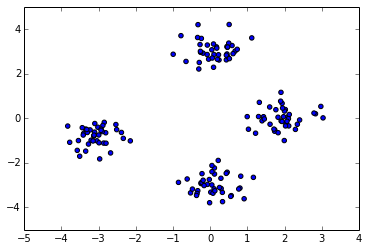

In [2]:
### generate sample
mean1 = np.array([0,3])
mean2 = np.array([-3,-1])
mean3 = np.array([2,0])
mean4 = np.array([0,-3])
conv = np.array([[0.2,0.0],[0.0,0.2]])

x1 = np.random.multivariate_normal(mean1,conv,(40))
x2 = np.random.multivariate_normal(mean2,conv,(40))
x3 = np.random.multivariate_normal(mean3,conv,(40))
x5 = np.random.multivariate_normal(mean4,conv,(40))

x4 =  np.concatenate([x1,x2,x3,x5],0)
x4 = shuffle(x4)
plt.scatter(x4[:,0],x4[:,1])


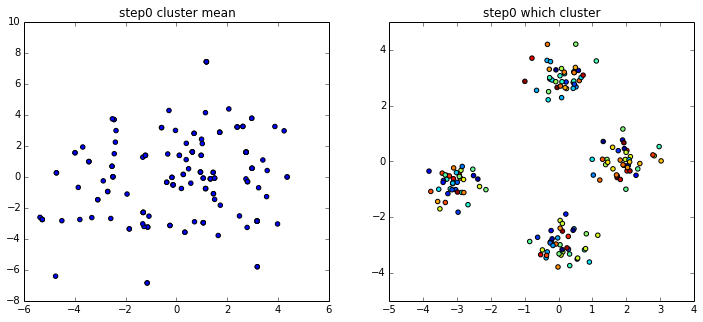

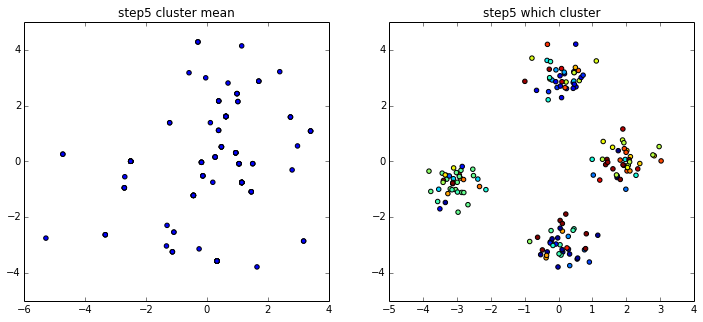

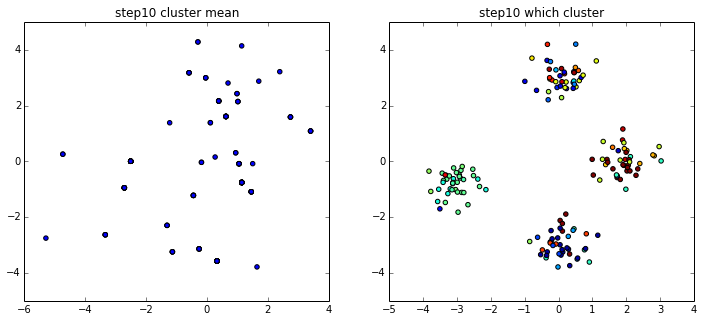

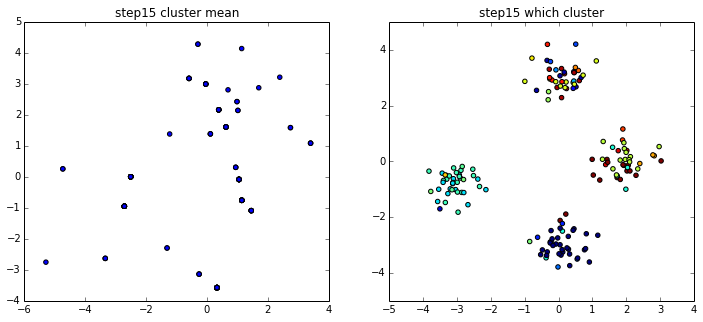

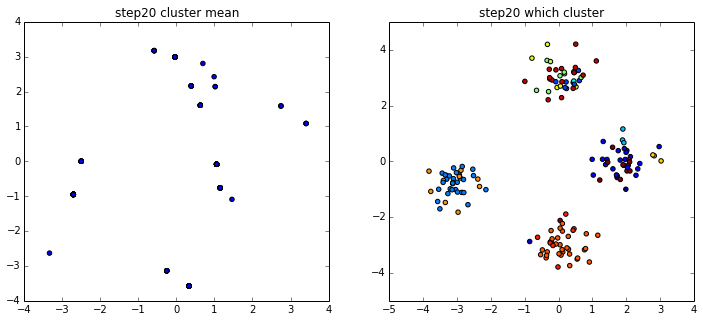

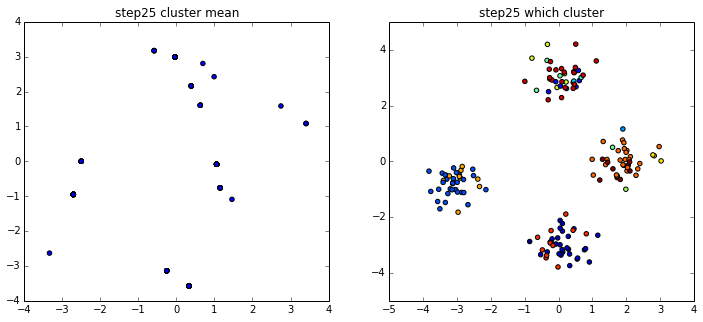

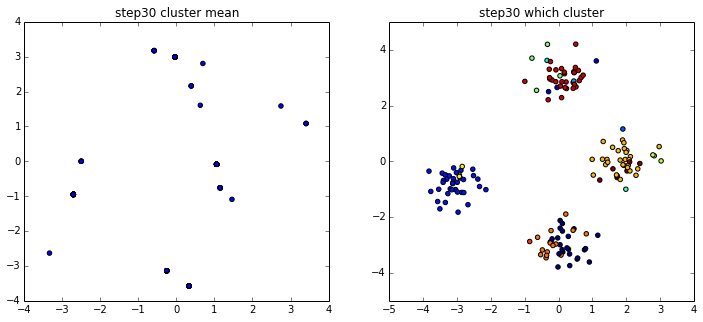

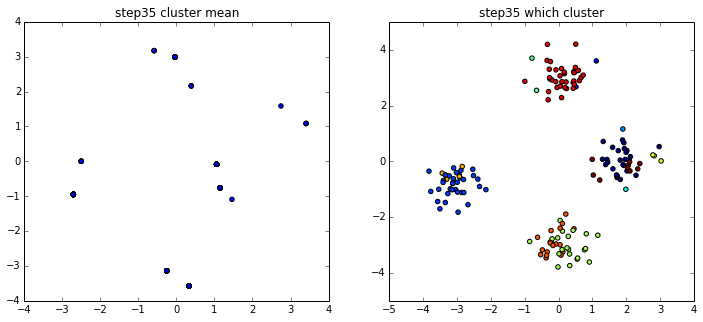

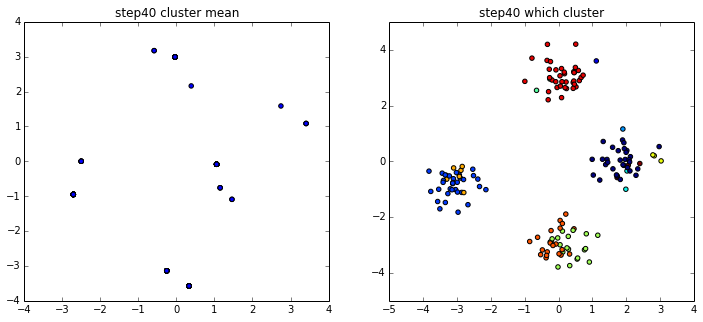

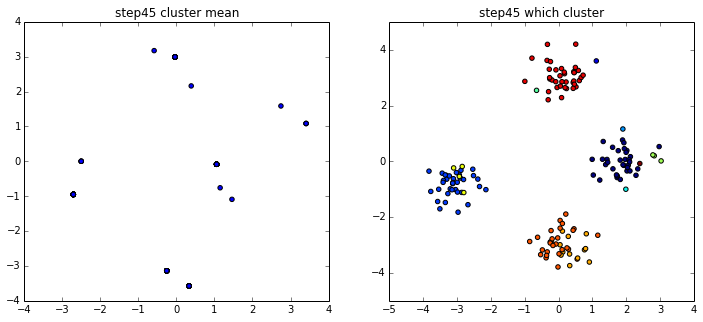

In [4]:
def get_ck(v):
    c =[]
    for i in range(len(v)):
        first = 1.0
        for j in range(i):
            first = first*(1 -v[j])
        c.append(first*v[i])
    return c

def dirichlet(alpha):
    v = np.random.beta(1,alpha,30)
    u = np.random.normal(0,3,60).reshape(30,2)
    ck = get_ck(v)
    ck.append(1-np.sum(ck))
    z = np.random.multinomial(1,ck)
    for i in range(len(z)):
        if z[i]==1:
            break
    return u[i]

alpha =1.0

def plotter(x,x4):
    color = [ i for i in set(x)]
    colorlist = []
    for i in range(len(x4)):
        colorlist.append(color.index(x[i]))
    return colorlist
    plt.plot(x4[:,0],x4[:,1],c=colorlist)
    plt.show()

first_mean =  np.random.normal(0,3,2*len(x4)).reshape(len(x4),2)

def sampler(_x,i,alpha=1.0):
    judge = np.random.uniform()
    judge2 = 1.0/(len(_x)-1+alpha)
    if judge2 < judge:
        c = np.random.randint(len(_x)-1)
        pesdo_x = np.delete(_x,i,0)
        return pesdo_x[c]
    else:
        return dirichlet(alpha)

x4 = shuffle(x4)  

#### main function
show_step =5
steptimes = 50

for j in range(steptimes):
    for i in range(len(x4)):
        mean = first_mean
        candidate = sampler(mean,i)
        alpha = sp.stats.multivariate_normal.pdf(x4[i],candidate,conv)*1.0/sp.stats.multivariate_normal.pdf(x4[i],mean[i],conv)
        acceptance = np.min([1,alpha])
        judger = np.random.uniform()
        if judger < acceptance:
            mean[i] = candidate
    if(j%show_step ==0):
        colorlist = plotter(mean[:,0],x4)
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.scatter(mean[:,0],mean[:,1])
        plt.title("step" +str(j)+ " cluster mean")
        plt.subplot(1,2,2)
        plt.scatter(x4[:,0],x4[:,1],c= np.array(colorlist)*1.0/max(colorlist))
        plt.title("step" +str(j)+" which cluster")
        ###plt.savefig("nppb_"+str(j/show_step)+".png")
        plt.show()
        
        